In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("website_data_with_classifications.csv")

In [12]:
year_columns = [column for column in df.columns if column.startswith("19") or column.startswith("20")]
df = df[year_columns]
df = df.fillna(0)
df = df.applymap(lambda x: 1 if x and str(x).strip() and str(x).strip() != '0' and len(str(x)) > 200 else 0)

/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_33167/1195571737.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x and str(x).strip() and str(x).strip() != '0' and len(str(x)) > 200 else 0)


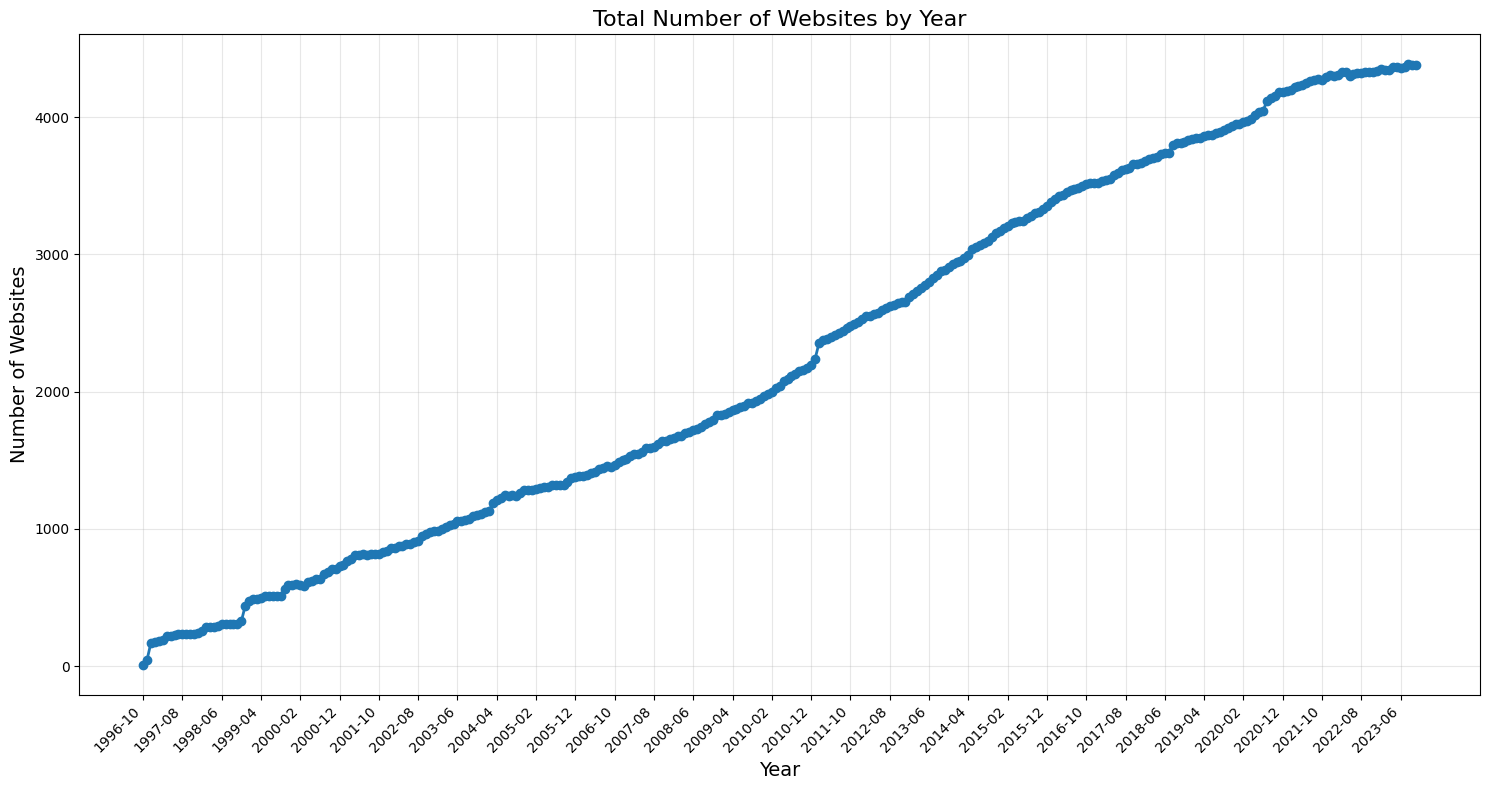

In [13]:
tick_positions = year_columns[::10]

plt.figure(figsize=(15, 8))
plt.plot(df.columns, df.sum(), marker='o', linewidth=2)
plt.title("Total Number of Websites by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Websites", fontsize=14)
plt.xticks(tick_positions, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
congresses = [110, 111, 112, 113, 114, 115, 116]
default_values = {}
for congress in congresses:
    phrase_df = pd.read_csv(f"Partisan Index/{congress}_congress_alpha_beta.csv")
    betas = phrase_df["beta"].tolist()
    alphas = phrase_df["alpha"].tolist()

    denominator = 0
    numerator = 0
    for (alpha, beta) in zip(alphas, betas):
        numerator += beta * -alpha
        denominator += beta * beta

    default_values[congress] = numerator / denominator

    print(f"Congress: {congress} ", " Value of Sum(beta_i * -alpha_i) / Sum(beta_i ^ 2): ", numerator/denominator)

Congress: 110   Value of Sum(beta_i * -alpha_i) / Sum(beta_i ^ 2):  0.5429763110878959
Congress: 111   Value of Sum(beta_i * -alpha_i) / Sum(beta_i ^ 2):  0.537753560663196
Congress: 112   Value of Sum(beta_i * -alpha_i) / Sum(beta_i ^ 2):  0.37690607211961086
Congress: 113   Value of Sum(beta_i * -alpha_i) / Sum(beta_i ^ 2):  0.29778211844105384
Congress: 114   Value of Sum(beta_i * -alpha_i) / Sum(beta_i ^ 2):  0.33861337237301475
Congress: 115   Value of Sum(beta_i * -alpha_i) / Sum(beta_i ^ 2):  0.487109637502079
Congress: 116   Value of Sum(beta_i * -alpha_i) / Sum(beta_i ^ 2):  0.43226759882950083
